##### Team Members: Minhthi Nguyen, Senit Ghile, Het Bhavesh Shah, Devesh Panneer Selvam

### We will be looking at a dataset which features entries from low income or disadvantaged communities in California, and their respective concentration of various pollutants, helath outcomes, and socioeconomic metrics. 

Link to dataset: https://catalog.data.gov/dataset/low-income-or-disadvantaged-communities-designated-by-california-b8da6  

## Important Columns & Definitions

OBJECTID_1 - Sequential unique numbers that are automatically generated.

COUNTYFP - California county unique number. 

Population - Population in census tract. 

CIscore - Pollution Score multiplied by Population Characteristics Score, known as California Enviroment Screen Score. 

Ozone - Daily maximum 8 hour Ozone concentration. 

PM2_5 - Annual mean particulate matter 2.5 concentrations. 

Diesel_PM - Diesel particulate matter emissions from on-road and non-road sources. 

Pesticides - Total pounds of selected active pesticide ingredients used in production-agriculture per square mile. 

Tox_Releases - Toxicity-weighted concentrations of modeled chemical releases to air from facility emissions. 

Traffic - Traffic density, in vehicle-kilometers per hour per road length. 

Drinking_Water - Drinking water contaminant index. 

Lead - Potential risk for lead exposure in children living in low-income communities with older housing. 

Cleanups - Number of Cleanup sites. 

GroundwaterThreats - sum of weighted leaking underground storage tank sites. 

Haz_Waste - Sum of weighted hazardous waste facilities. 

Imp_Water_Bodies - Impaired water bodies, sum of number of pollutants across all impaired water bodies. 

Solid_Waste - Sum of weighted solid waste sites and facilities

Pollution - Rate of pollution. 

PollutionScore - Average of percentiles from the pollution burden indicators.  

Asthma - Rate of emergency department visits for asthma. 

Low_Birth_Weight - Percent low birth weight. 

Cardiovascular - Rate of emergency department visits for heart attacks per 10,000. 

Poverty - Percent of population living below two times the federal poverty level. 

Unemployment - Population that is unemployed and eligible for the labor force. 

Child_10 - Percent of total population that is under 10 years old. 

Pop_10_64 - Percent of population that is between 10 and 64 years old. 

Elderly_65 - Percent of population that is over 65 years old. 

Hispanic - Percent of population that is white. 

White - Percent of total population that is white. 

African_American - Percent of total population that is African American. 

Native_American - Percent of total population that is Native American. 

Asian_American - Percent of population that is Asian American. 

Pacific_Islander - Percent of total population that is Pacific Islander. 

Other_Multiple - Percent of total population that is either multiple races/ethnicities or identifies as a race/ethnicity. 

County - California county. 

Avg_hshld_size - Average household size per county. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df = pd.read_csv('Low-Income_or_Disadvantaged_Communities_Designated_by_California.csv')

In [2]:
df.head(1)

,OBJECTID_1,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,MHI_2019_5YR,Avg_hshld_size,HCD_Low_2021,HCD_Moderate_2021,State_MHI_2019,State_MHI_Percent,Income_Group,DAC_and_or_LIC,Shape__Area,Shape__Length
0,1,6,37,204920,6037204920,2049.2,Census Tract 2049.20,G5020,S,909972,...,"$39,904",4.0,"$94,600","$96,000",75235.0,53.04%,Low,Yes,909975.2496,3900.202222


# Cleaning the Data

### Step 1: remove all unnecessary columns

List of all attributes that are not needed and that will be dropped, they are one of these: 
1. Duplicate columns 
2. Unneeded info that is specific to that dataset 
3. Percentiles 

In [3]:
drop_columns = ['STATEFP', 'STATEFP', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'INTPTLAT', 'Tract_Area', \
                'tract_t', 'TRACTCE', 'INTPTLON', 'Tract_1', 'OBJECTID_12', 'Shape__Length', 'Shape__Area', \
                'OBJECTID', 'CIscoreP', 'State_MHI_Percent', 'State_MHI_2019', 'PopCharP', 'DAC_category', \
                'ZIP', 'HCD_Low_2021', 'Income_Group'] 

In [4]:
df = df.drop(columns=drop_columns)

In [5]:
df = df.drop(columns=[name for name in df.columns if name.endswith('Pctl')])

### Step 2: Fill in Missing Data

We decided to fill nan's with the average, forward fill, or back fill

In [6]:
# Fill nan w/ average  

df.Child_10.mean()
child_10_avg = df.Child_10.mean()
df.fillna({'Child_10':child_10_avg}, inplace=True)

df.Pop_10_64.mean()
Pop_10_64_avg = df.Pop_10_64.mean()
df.fillna({'Pop_10_64':Pop_10_64_avg}, inplace=True)

df.Elderly_65.mean()
Elderly_65_avg = df.Elderly_65.mean()
df.fillna({'Elderly_65':Elderly_65_avg}, inplace=True)

14.130404391304348

74.98006169565217

10.889531695652172

In [7]:
# back and forward fill

df.HCD_Low_2021.ffill(inplace=True)

df.HCD_Moderate_2021.ffill(inplace=True)

df.Avg_hshld_size.ffill(inplace=True)

df.Income_Group.bfill(inplace=True)

df.MHI_2019_5YR.bfill(inplace=True)

We original filled all the pollution columns with the avergae, but when completing analysis we realized this completely skewed the data. So we did a mix between forward and backward fill. Although this also did not give the **best** results, forward and backward fill gave better results than the average. 

In [8]:
# fillna w/ average (we did not end up using thia)

pollution_list = ['CIscore', 'Ozone', 'PM2_5', 'Diesel_PM', 'Pesticides', 'Tox_Releases', 'Traffic',\
                  'Drinking_Water', 'Lead', 'Cleanups', 'GroundwaterThreats', 'Haz_Waste', 'Imp_Water_Bodies', 'Solid_Waste',\
                  'PollutionScore', 'Asthma', 'Low_Birth_Weight', 'Cardiovascular', 'Education', 'Ling_Isol', 'Poverty',\
                  'Unemployment', 'HousBurd', 'Pollution', 'PopCharScore', 'PopChar']

for item in pollution_list: 
    mean_value = df[item].mean()
    df[item].fillna(mean_value, inplace=True)

We used this method instead

In [8]:
pollution_list_1 = ['CIscore', 'Ozone', 'PM2_5', 'Diesel_PM', 'Pesticides', 'Tox_Releases', 'Traffic',\
'Drinking_Water', 'Lead', 'Cleanups', 'GroundwaterThreats'] 

In [9]:
for item in pollution_list_1: 
    df[item].ffill(inplace=True)

In [10]:
pollution_list_2 = ['Haz_Waste', 'Imp_Water_Bodies', 'Solid_Waste',\
'PollutionScore', 'Asthma', 'Low_Birth_Weight', 'Cardiovascular', 'Education', 'Ling_Isol', 'Poverty',\
'Unemployment', 'HousBurd'] 

In [11]:
for item in pollution_list_2: 
    df[item].bfill(inplace=True)

In [12]:
race_ethnicity_list = ['Hispanic', 'White', 'African_American', 'Native_American', 'Asian_American', \
                       'Pacific_Islander', 'Other_Multiple']

In [13]:
for item in race_ethnicity_list: 
    df[item].bfill(inplace=True)

In [28]:
df.isna().sum()

OBJECTID_1            0
COUNTYFP              0
ALAND                 0
AWATER                0
Tract                 0
Lat                   0
Long                  0
Population            0
CIscore               0
Ozone                 0
PM2_5                 0
Diesel_PM             0
Pesticides            0
Tox_Releases          0
Traffic               0
Drinking_Water        0
Lead                  0
Cleanups              0
GroundwaterThreats    0
Haz_Waste             0
Imp_Water_Bodies      0
Solid_Waste           0
Pollution             0
PollutionScore        0
Asthma                0
Low_Birth_Weight      0
Cardiovascular        0
Education             0
Ling_Isol             0
Poverty               0
Unemployment          0
HousBurd              0
PopChar               0
Child_10              0
Pop_10_64             0
Elderly_65            0
Hispanic              0
White                 0
African_American      0
Native_American       0
Asian_American        0
Pacific_Islander

# Data Analysis

### Finding 1: 
Despite Pacific Islanders making up only about 0.32% of the data set, they have the highest concentration of 7 out of 10 pollutants.

### Managerial Insight 1: 
Local and state governments, health organizations, and businesses should invest in improving infrastructure and regulations in Pacific Islander communities.

1. Managers should prioritize environmental monitoring, regulation, and intervention in areas where Pacific Islanders live and work. This could involve stricter policies and control measures or organizing health intervention programs to mitigate the effects of disproportionate pollutants in the area.

2. Managers should be conscious of how certain industries or businesses may be contributing significantly to pollution in those areas. Managers should review the environmental impact of those industries, and may need to consider investing in cleaner technologies, or even rezoning to reduce pollution exposure.

In [9]:
# average concentration of various pollutants

df[['PM2_5', 'Ozone', 'Diesel_PM', 'Pesticides', 'Tox_Releases', 'Lead', 'GroundwaterThreats', 'Haz_Waste',\
    'Imp_Water_Bodies', 'Solid_Waste']].mean()

PM2_5                   11.701300
Ozone                    0.051898
Diesel_PM                0.336611
Pesticides             330.295994
Tox_Releases          3035.620683
Lead                    67.952865
GroundwaterThreats      24.137879
Haz_Waste                1.082426
Imp_Water_Bodies         3.803463
Solid_Waste              3.042446
dtype: float64

In [10]:
# max and min concentration of various pollutants

df[['PM2_5', 'Ozone', 'Diesel_PM', 'Pesticides', 'Tox_Releases', 'Lead', 'GroundwaterThreats', 'Haz_Waste',\
    'Imp_Water_Bodies', 'Solid_Waste']].agg(['max', 'min'])

,PM2_5,Ozone,Diesel_PM,Pesticides,Tox_Releases,Lead,GroundwaterThreats,Haz_Waste,Imp_Water_Bodies,Solid_Waste
max,16.394748,0.073132,2.605266,62980.85215,96985.629960,99.352332,533.35,22.27,37.0,64.25
min,5.494094,0.029372,0.003264,0.00000,0.116769,0.501012,0.00,0.00,0.0,0.00


In [11]:
# average proportion of various racial/ethnic groups

df[['Hispanic', 'White', 'African_American', 'Native_American', 'Asian_American', 'Pacific_Islander',\
    'Other_Multiple']].mean()

Hispanic            63.585281
White               15.754031
African_American     8.499272
Native_American      0.374236
Asian_American       9.473937
Pacific_Islander     0.321474
Other_Multiple       1.991768
dtype: float64

In [12]:
pollutants = ['PM2_5', 'Ozone', 'Diesel_PM', 'Pesticides', 'Tox_Releases', 'Lead', 
              'GroundwaterThreats', 'Haz_Waste', 'Imp_Water_Bodies', 'Solid_Waste']

# Dictionary for storing average pollutant concentration for each racial/ethnic group
avg_pollutants = {}

# Calculate the average for each pollutant by racial/ethnic group
for pollutant in pollutants:
    avg_pollutants[pollutant] = {
        'Hispanic': df.groupby('Hispanic')[pollutant].mean().mean(),
        'White': df.groupby('White')[pollutant].mean().mean(),
        'African_American': df.groupby('African_American')[pollutant].mean().mean(),
        'Native_American': df.groupby('Native_American')[pollutant].mean().mean(),
        'Asian_American': df.groupby('Asian_American')[pollutant].mean().mean(),
        'Pacific_Islander': df.groupby('Pacific_Islander')[pollutant].mean().mean(),
        'Other_Multiple': df.groupby('Other_Multiple')[pollutant].mean().mean()
    }

# Convert the dictionary to a DataFrame
pollutants_df = pd.DataFrame(avg_pollutants)

In [13]:
pollutants_df

,PM2_5,Ozone,Diesel_PM,Pesticides,Tox_Releases,Lead,GroundwaterThreats,Haz_Waste,Imp_Water_Bodies,Solid_Waste
Hispanic,11.700325,0.051921,0.335646,332.588736,2980.186024,67.950791,23.848670,1.054400,3.777027,3.024346
White,11.694925,0.051943,0.335802,335.735432,2962.684527,67.807879,23.956563,1.057837,3.789987,3.026337
African_American,11.678304,0.051782,0.341899,301.111944,3036.556472,67.455070,23.428097,1.070693,3.800737,2.969069
Native_American,11.641367,0.052339,0.319987,360.637717,2519.857918,66.033664,27.152929,0.987655,3.960475,3.172490
Asian_American,11.683851,0.052011,0.336432,348.864497,2884.781299,66.908091,24.469608,1.029637,3.845955,3.020171
Pacific_Islander,11.361640,0.049605,0.349807,444.432909,3156.699334,65.286874,30.295681,1.228938,4.599936,3.190930
Other_Multiple,11.654218,0.051869,0.333389,335.926438,2888.272444,66.196273,24.508796,1.028301,3.839487,3.051163


In [14]:
pollutants_df = pollutants_df.reset_index()
pollutants_df = pollutants_df.rename(columns={'index': 'Racial/Ethnic Group'})

In [15]:
pollutants_df

,Racial/Ethnic Group,PM2_5,Ozone,Diesel_PM,Pesticides,Tox_Releases,Lead,GroundwaterThreats,Haz_Waste,Imp_Water_Bodies,Solid_Waste
0,Hispanic,11.700325,0.051921,0.335646,332.588736,2980.186024,67.950791,23.848670,1.054400,3.777027,3.024346
1,White,11.694925,0.051943,0.335802,335.735432,2962.684527,67.807879,23.956563,1.057837,3.789987,3.026337
2,African_American,11.678304,0.051782,0.341899,301.111944,3036.556472,67.455070,23.428097,1.070693,3.800737,2.969069
3,Native_American,11.641367,0.052339,0.319987,360.637717,2519.857918,66.033664,27.152929,0.987655,3.960475,3.172490
4,Asian_American,11.683851,0.052011,0.336432,348.864497,2884.781299,66.908091,24.469608,1.029637,3.845955,3.020171
5,Pacific_Islander,11.361640,0.049605,0.349807,444.432909,3156.699334,65.286874,30.295681,1.228938,4.599936,3.190930
6,Other_Multiple,11.654218,0.051869,0.333389,335.926438,2888.272444,66.196273,24.508796,1.028301,3.839487,3.051163


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Racial/Ethnic Group', ylabel='value'>

Text(0.5, 1.0, 'Average Pollutant Concentration by Racial/Ethnic Group')

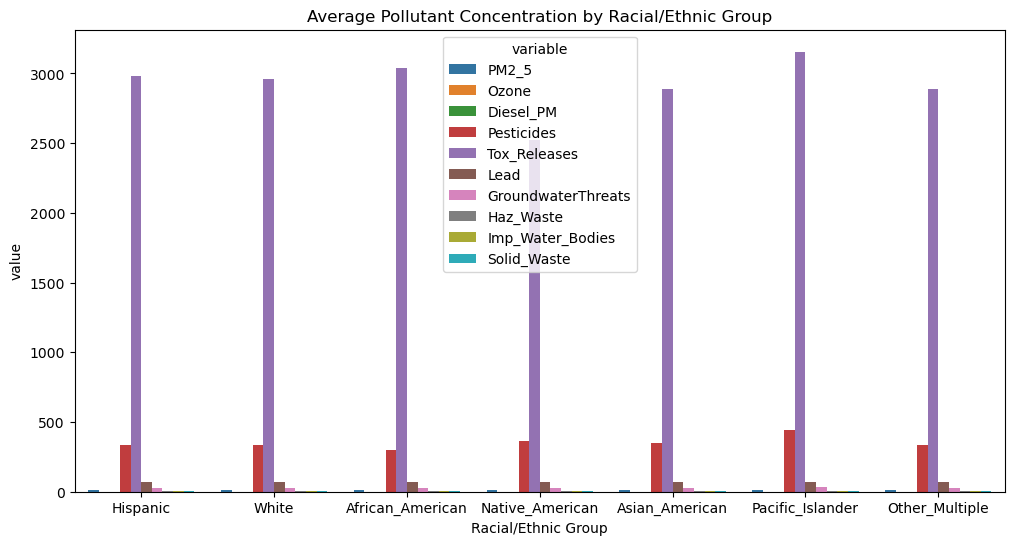

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Racial/Ethnic Group', y='value', hue='variable',\
            data=pollutants_df.melt(id_vars=['Racial/Ethnic Group'], value_vars=pollutants))

plt.title('Average Pollutant Concentration by Racial/Ethnic Group')

In [17]:
percent_df = pollutants_df.copy()

In [18]:
# normalize the bar chart since concentration is not measured on the same metric
# convert to percentage (by dividing averages by max concentration for each type of pollutant)

percent_df['PM2_5_%'] = percent_df['PM2_5'].apply(lambda x: x/df.PM2_5.max())
percent_df['Ozone_%'] = percent_df['Ozone'].apply(lambda x: x/df.Ozone.max())
percent_df['Diesel_PM_%'] = percent_df['Diesel_PM'].apply(lambda x: x/df.Diesel_PM.max())
percent_df['Pesticides_%'] = percent_df['Pesticides'].apply(lambda x: x/df.Pesticides.max())
percent_df['Tox_Releases_%'] = percent_df['Tox_Releases'].apply(lambda x: x/df.Tox_Releases.max())
percent_df['Lead_%'] = percent_df['Lead'].apply(lambda x: x/df.Lead.max())
percent_df['GroundwaterThreats_%'] = percent_df['GroundwaterThreats'].apply(lambda x: x/df.GroundwaterThreats.max())
percent_df['Haz_Waste_%'] = percent_df['Haz_Waste'].apply(lambda x: x/df.Haz_Waste.max())
percent_df['Imp_Water_Bodies_%'] = percent_df['Imp_Water_Bodies'].apply(lambda x: x/df.Imp_Water_Bodies.max())
percent_df['Solid_Waste_%'] = percent_df['Solid_Waste'].apply(lambda x: x/df.Solid_Waste.max())

In [19]:
percent_df

,Racial/Ethnic Group,PM2_5,Ozone,Diesel_PM,Pesticides,Tox_Releases,Lead,GroundwaterThreats,Haz_Waste,Imp_Water_Bodies,...,PM2_5_%,Ozone_%,Diesel_PM_%,Pesticides_%,Tox_Releases_%,Lead_%,GroundwaterThreats_%,Haz_Waste_%,Imp_Water_Bodies_%,Solid_Waste_%
0,Hispanic,11.700325,0.051921,0.335646,332.588736,2980.186024,67.950791,23.848670,1.054400,3.777027,...,0.713663,0.709958,0.128833,0.005281,0.030728,0.683938,0.044715,0.047346,0.102082,0.047072
1,White,11.694925,0.051943,0.335802,335.735432,2962.684527,67.807879,23.956563,1.057837,3.789987,...,0.713334,0.710265,0.128894,0.005331,0.030548,0.682499,0.044917,0.047501,0.102432,0.047103
2,African_American,11.678304,0.051782,0.341899,301.111944,3036.556472,67.455070,23.428097,1.070693,3.800737,...,0.712320,0.708061,0.131234,0.004781,0.031309,0.678948,0.043926,0.048078,0.102723,0.046211
3,Native_American,11.641367,0.052339,0.319987,360.637717,2519.857918,66.033664,27.152929,0.987655,3.960475,...,0.710067,0.715676,0.122823,0.005726,0.025982,0.664641,0.050910,0.044349,0.107040,0.049377
4,Asian_American,11.683851,0.052011,0.336432,348.864497,2884.781299,66.908091,24.469608,1.029637,3.845955,...,0.712658,0.711193,0.129135,0.005539,0.029744,0.673443,0.045879,0.046234,0.103945,0.047007
5,Pacific_Islander,11.361640,0.049605,0.349807,444.432909,3156.699334,65.286874,30.295681,1.228938,4.599936,...,0.693005,0.678299,0.134269,0.007057,0.032548,0.657125,0.056803,0.055184,0.124323,0.049664
6,Other_Multiple,11.654218,0.051869,0.333389,335.926438,2888.272444,66.196273,24.508796,1.028301,3.839487,...,0.710851,0.709252,0.127967,0.005334,0.029780,0.666278,0.045953,0.046174,0.103770,0.047489


In [20]:
percent_df.drop(columns = ['PM2_5', 'Ozone', 'Diesel_PM', 'Pesticides', 'Tox_Releases', 'Lead', 'GroundwaterThreats',\
                           'Haz_Waste', 'Imp_Water_Bodies', 'Solid_Waste'])

,Racial/Ethnic Group,PM2_5_%,Ozone_%,Diesel_PM_%,Pesticides_%,Tox_Releases_%,Lead_%,GroundwaterThreats_%,Haz_Waste_%,Imp_Water_Bodies_%,Solid_Waste_%
0,Hispanic,0.713663,0.709958,0.128833,0.005281,0.030728,0.683938,0.044715,0.047346,0.102082,0.047072
1,White,0.713334,0.710265,0.128894,0.005331,0.030548,0.682499,0.044917,0.047501,0.102432,0.047103
2,African_American,0.712320,0.708061,0.131234,0.004781,0.031309,0.678948,0.043926,0.048078,0.102723,0.046211
3,Native_American,0.710067,0.715676,0.122823,0.005726,0.025982,0.664641,0.050910,0.044349,0.107040,0.049377
4,Asian_American,0.712658,0.711193,0.129135,0.005539,0.029744,0.673443,0.045879,0.046234,0.103945,0.047007
5,Pacific_Islander,0.693005,0.678299,0.134269,0.007057,0.032548,0.657125,0.056803,0.055184,0.124323,0.049664
6,Other_Multiple,0.710851,0.709252,0.127967,0.005334,0.029780,0.666278,0.045953,0.046174,0.103770,0.047489


In [21]:
pollutants_percent = ['PM2_5_%', 'Ozone_%', 'Diesel_PM_%', 'Pesticides_%', 'Tox_Releases_%', 'Lead_%',\
                      'GroundwaterThreats_%', 'Haz_Waste_%', 'Imp_Water_Bodies_%', 'Solid_Waste_%']

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Racial/Ethnic Group', ylabel='value'>

Text(0.5, 1.0, 'Pollutant Concentration Percentages by Racial/Ethnic Group')

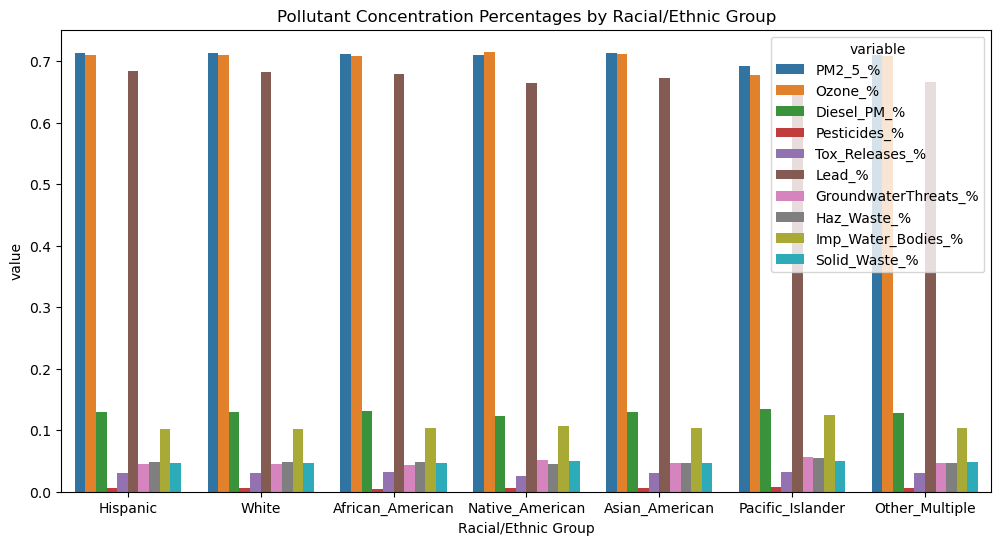

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Racial/Ethnic Group', y='value', hue='variable',\
            data=percent_df.melt(id_vars=['Racial/Ethnic Group'], value_vars=pollutants_percent))

plt.title('Pollutant Concentration Percentages by Racial/Ethnic Group')

C:\Users\minht\Downloads\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Fine Particulate Matter Percentage by Racial/Ethnic Group')

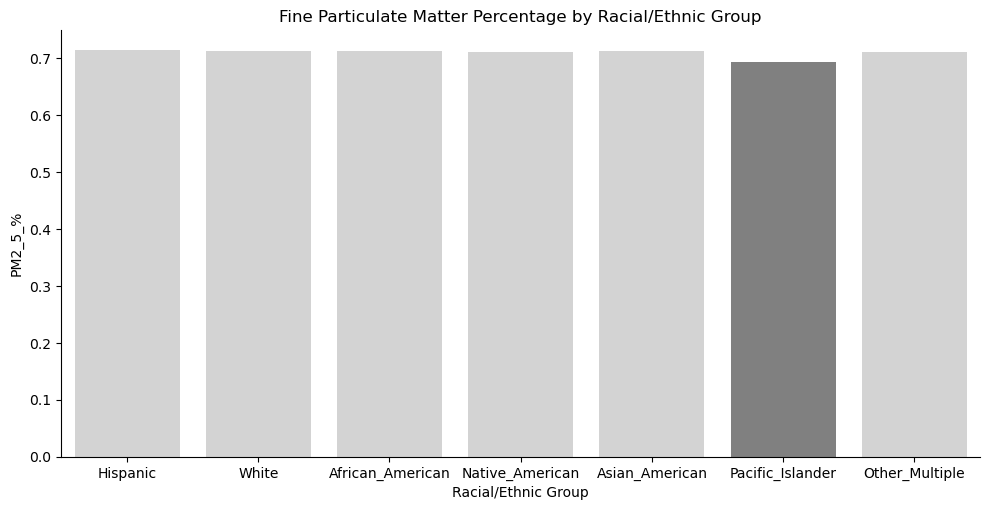

In [23]:
sns.catplot(x='Racial/Ethnic Group', y='PM2_5_%', kind='bar', data=percent_df, aspect=2,\
           palette=['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'grey', 'lightgrey'])

plt.title('Fine Particulate Matter Percentage by Racial/Ethnic Group')

C:\Users\minht\Downloads\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Ozone Percentage by Racial/Ethnic Group')

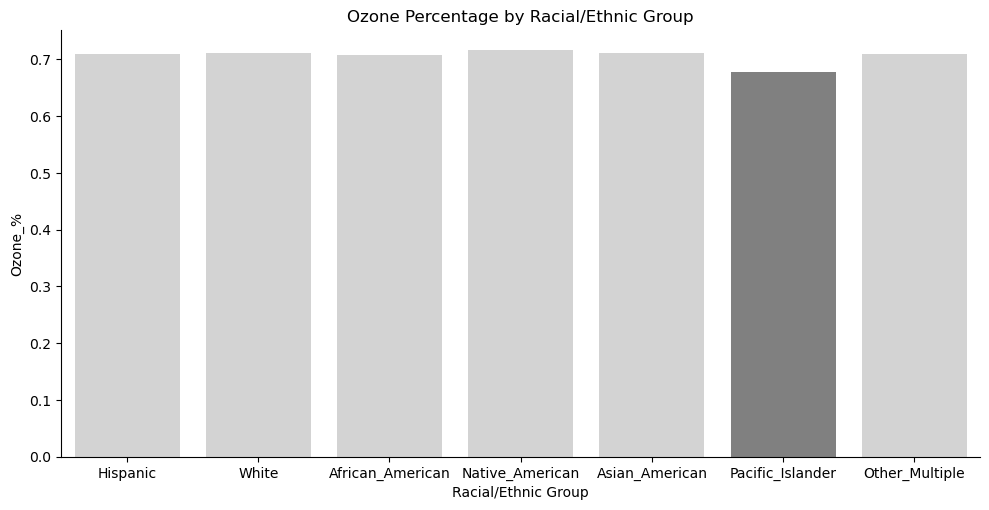

In [24]:
sns.catplot(x='Racial/Ethnic Group', y='Ozone_%', kind='bar', data=percent_df, aspect=2,\
           palette=['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'grey', 'lightgrey'])

plt.title('Ozone Percentage by Racial/Ethnic Group')

C:\Users\minht\Downloads\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Diesel Particulate Matter Percentage by Racial/Ethnic Group')

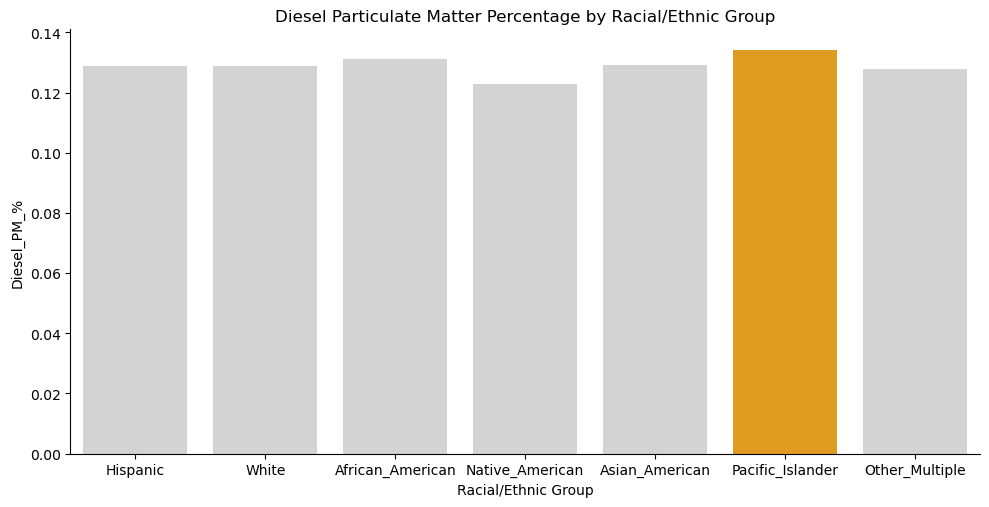

In [25]:
sns.catplot(x='Racial/Ethnic Group', y='Diesel_PM_%', kind='bar', data=percent_df, aspect=2,\
           palette=['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'orange', 'lightgrey'])

plt.title('Diesel Particulate Matter Percentage by Racial/Ethnic Group')

C:\Users\minht\Downloads\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Pesticides Percentage by Racial/Ethnic Group')

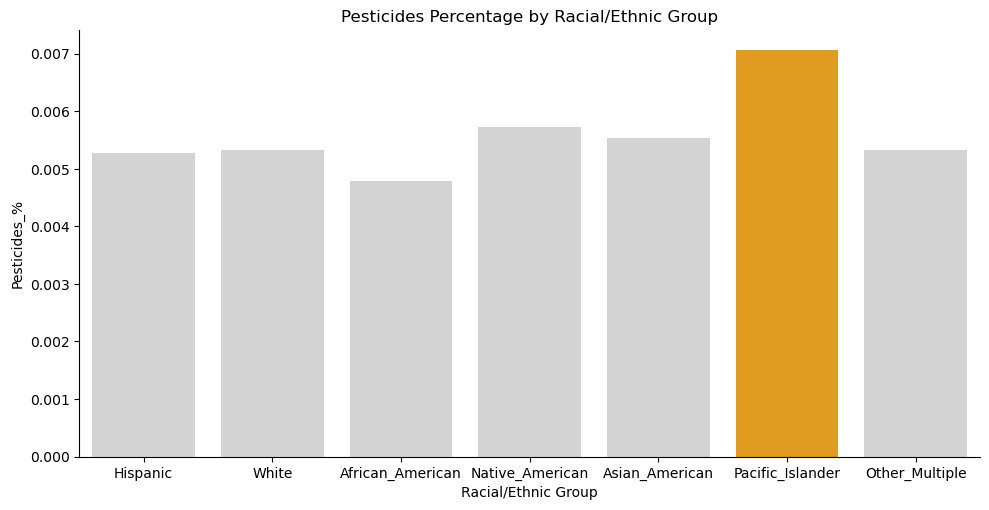

In [26]:
sns.catplot(x='Racial/Ethnic Group', y='Pesticides_%', kind='bar', data=percent_df, aspect=2,\
           palette=['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'orange', 'lightgrey'])

plt.title('Pesticides Percentage by Racial/Ethnic Group')

C:\Users\minht\Downloads\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Tox Releases Percentage by Racial/Ethnic Group')

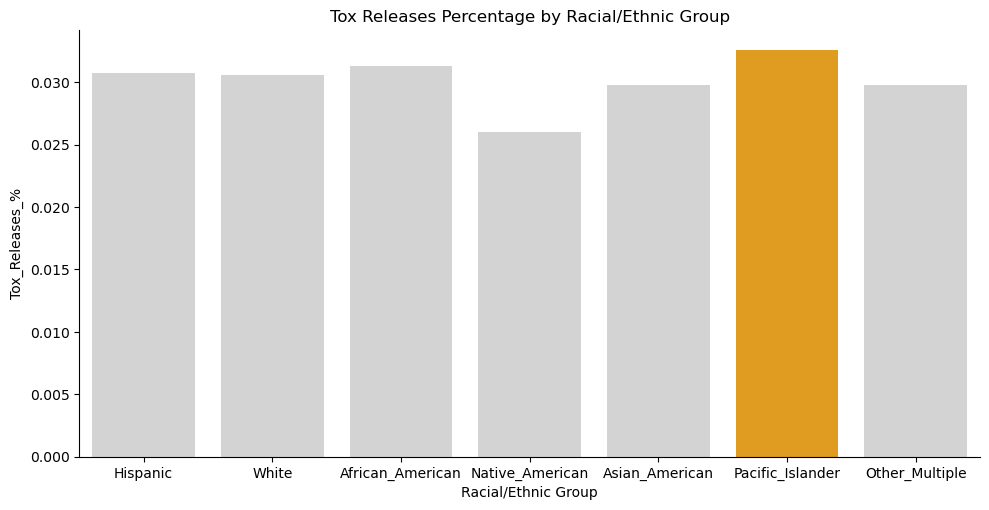

In [27]:
sns.catplot(x='Racial/Ethnic Group', y='Tox_Releases_%', kind='bar', data=percent_df, aspect=2,\
           palette=['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'orange', 'lightgrey'])

plt.title('Tox Releases Percentage by Racial/Ethnic Group')

C:\Users\minht\Downloads\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Lead Percentage by Racial/Ethnic Group')

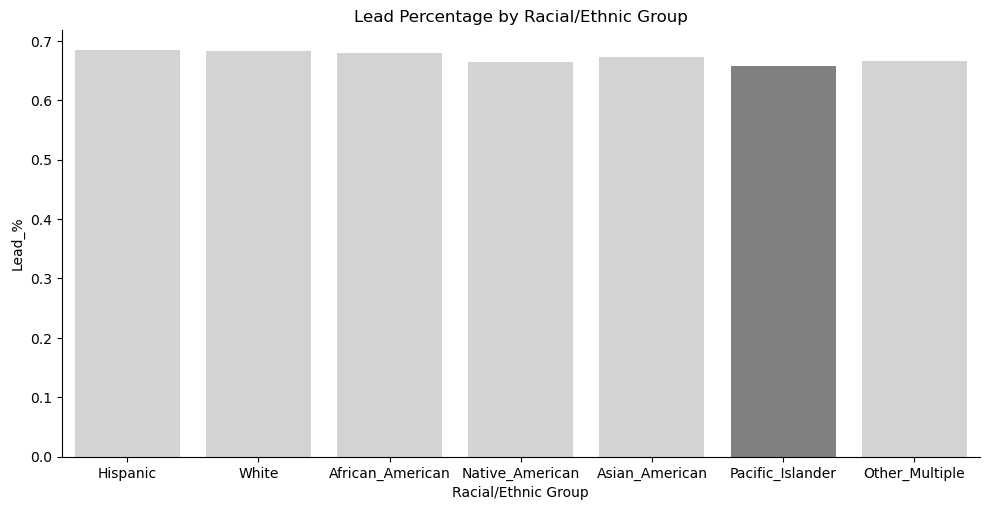

In [28]:
sns.catplot(x='Racial/Ethnic Group', y='Lead_%', kind='bar', data=percent_df, aspect=2,\
           palette=['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'grey', 'lightgrey'])

plt.title('Lead Percentage by Racial/Ethnic Group')

C:\Users\minht\Downloads\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Groundwater Threats Percentage by Racial/Ethnic Group')

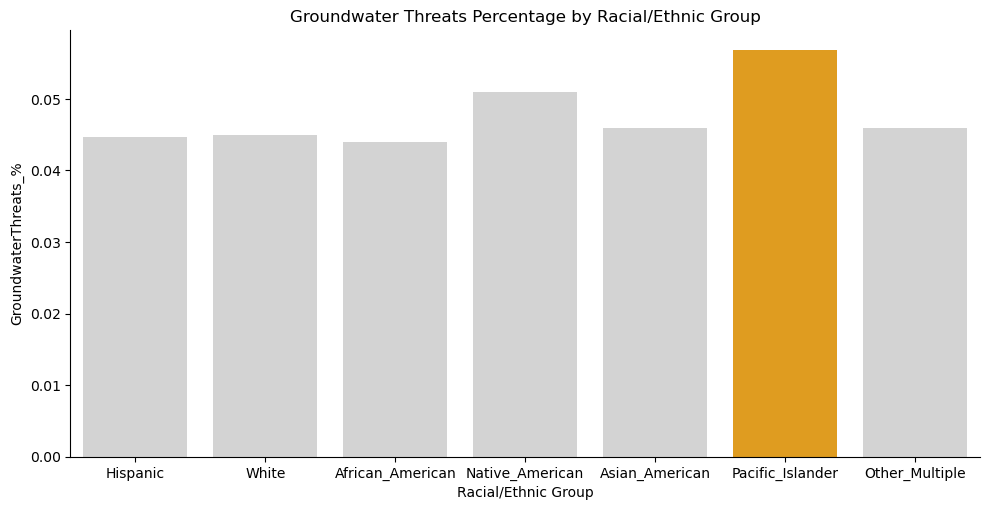

In [29]:
sns.catplot(x='Racial/Ethnic Group', y='GroundwaterThreats_%', kind='bar', data=percent_df, aspect=2,\
           palette=['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'orange', 'lightgrey'])

plt.title('Groundwater Threats Percentage by Racial/Ethnic Group')

C:\Users\minht\Downloads\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Hazardous Waste Percentage by Racial/Ethnic Group')

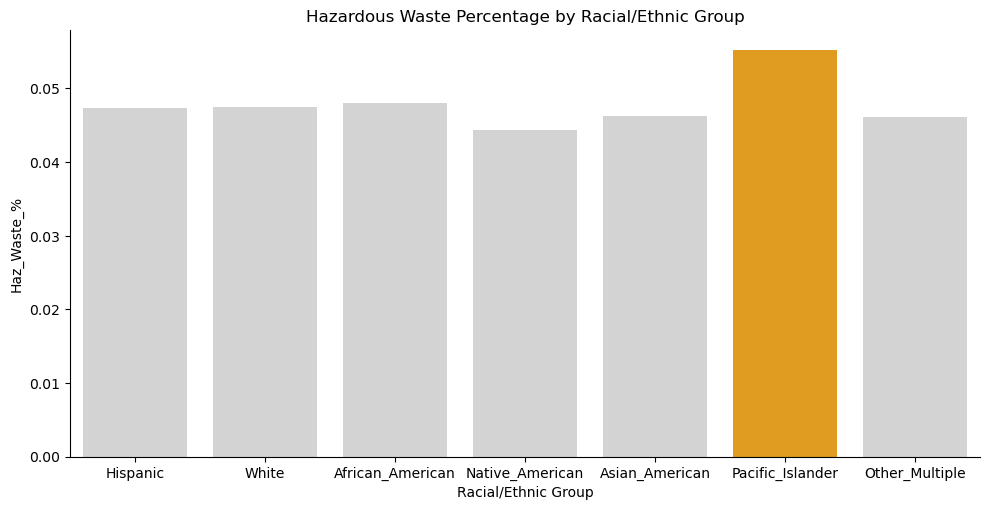

In [30]:
sns.catplot(x='Racial/Ethnic Group', y='Haz_Waste_%', kind='bar', data=percent_df, aspect=2,\
           palette=['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'orange', 'lightgrey'])

plt.title('Hazardous Waste Percentage by Racial/Ethnic Group')

C:\Users\minht\Downloads\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Impure Water Bodies Percentage by Racial/Ethnic Group')

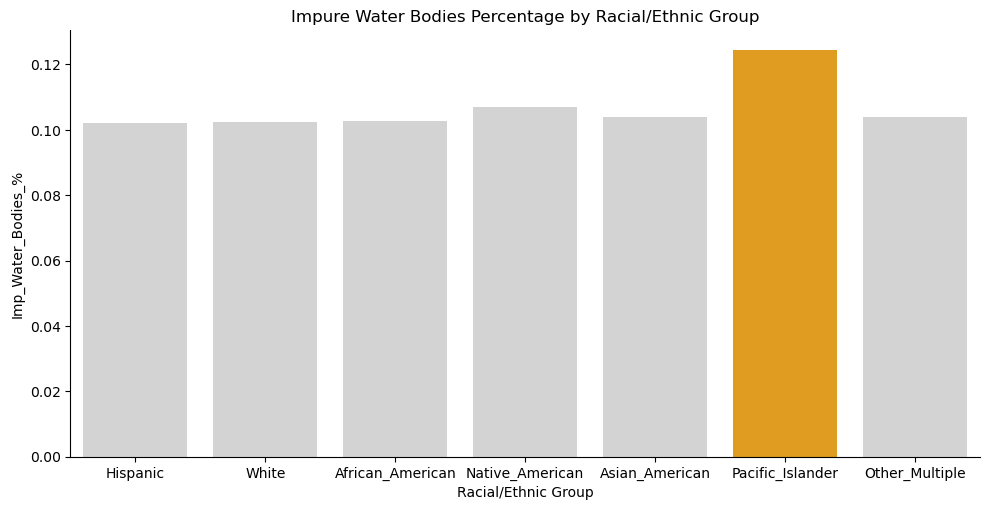

In [31]:
sns.catplot(x='Racial/Ethnic Group', y='Imp_Water_Bodies_%', kind='bar', data=percent_df, aspect=2,\
           palette=['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'orange', 'lightgrey'])

plt.title('Impure Water Bodies Percentage by Racial/Ethnic Group')

C:\Users\minht\Downloads\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Solid Waste Percentage by Racial/Ethnic Group')

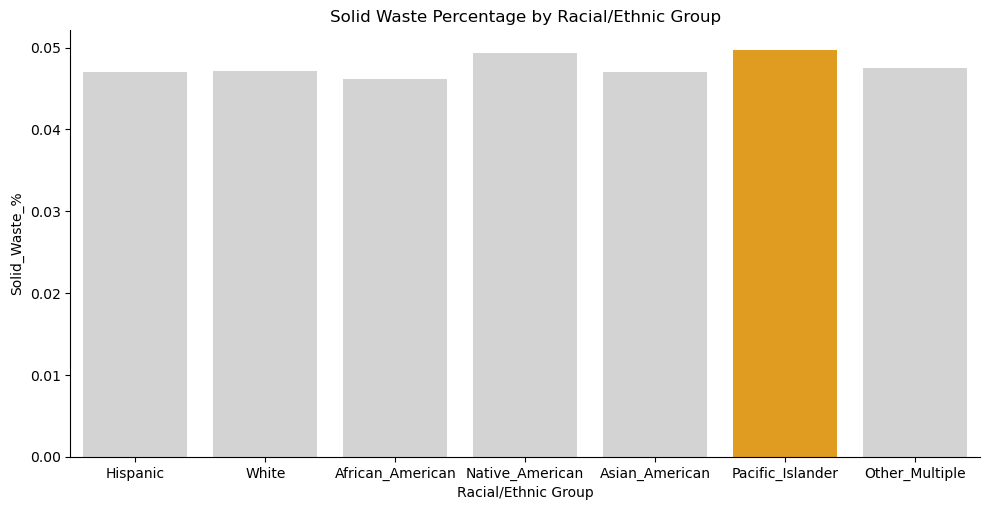

In [32]:
sns.catplot(x='Racial/Ethnic Group', y='Solid_Waste_%', kind='bar', data=percent_df, aspect=2,\
           palette=['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'orange', 'lightgrey'])

plt.title('Solid Waste Percentage by Racial/Ethnic Group')

### Finding 2: 
The 5 counties with the lowest level of pollution are located in northern California, whereas 3 out of the 5 counties with the highest level of pollution are located in southern California.

### Managerial Insight 2: 
Counties in northern California may have more policies or regulations which help to mitigate the level of pollutants, in contrast to counties in southern California.

1. Counties in southern California may want to adopt similar policies or regulations as northern California in order to lower their own pollution levels.
2. Managers can urge organizations to prioritize environmental initiatives, such as green technologies, renewable energy adoption, and stricter control measures. 

In [33]:
df.groupby('County')['Pollution'].mean().sort_values()

County
Sonoma            43.734162
Solano            46.693078
Sacramento        47.451960
Contra Costa      49.051548
Glenn             49.316832
Imperial          49.539556
Santa Clara       49.770928
Riverside         50.329106
San Francisco     50.662156
Kern              50.881691
Merced            51.102430
Alameda           51.103278
San Bernardino    51.390614
Butte             51.644652
San Diego         51.705628
San Joaquin       51.814870
Kings             52.067362
Stanislaus        52.244756
Madera            52.502660
Santa Barbara     52.729450
Yuba              52.786132
Monterey          53.261712
Fresno            53.311436
Santa Cruz        53.392771
Sutter            53.870817
Tulare            54.036139
San Mateo         55.416976
Ventura           56.296840
Yolo              56.933159
Los Angeles       57.884580
Orange            58.540452
Name: Pollution, dtype: float64

In [34]:
# counties with the highest concentration of pollution

df.groupby('County')['Pollution'].mean().nlargest(5)

County
Orange         58.540452
Los Angeles    57.884580
Yolo           56.933159
Ventura        56.296840
San Mateo      55.416976
Name: Pollution, dtype: float64

<Axes: xlabel='County'>

Text(0.5, 1.0, '5 Counties with Highest Average Pollution Levels')

Text(0.5, 0, 'County')

Text(0, 0.5, 'Average Pollution Level')

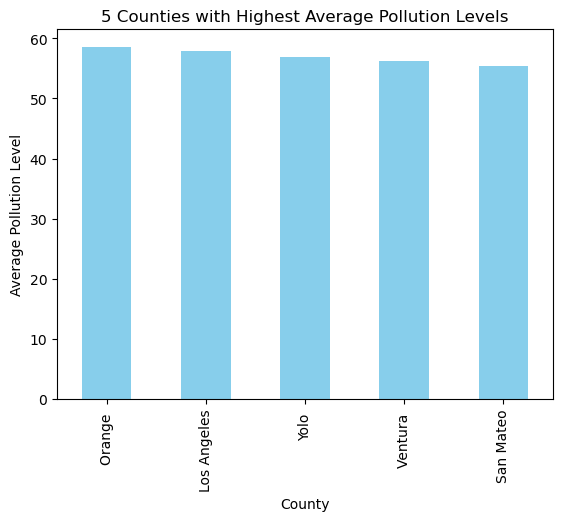

In [35]:
df.groupby('County')['Pollution'].mean().nlargest(5).plot(kind='bar', color='skyblue')

plt.title("5 Counties with Highest Average Pollution Levels")
plt.xlabel("County")
plt.ylabel("Average Pollution Level")

In [36]:
top_5_pollution = df.groupby('County')['Pollution'].mean().nlargest(5).index

top5_df = df[df['County'].isin(top_5_pollution)].groupby('County')[['PM2_5', 'Ozone', 'Diesel_PM', 'Pesticides',\
                    'Tox_Releases', 'Lead', 'GroundwaterThreats', 'Haz_Waste', 'Imp_Water_Bodies', 'Solid_Waste']].mean()

In [37]:
top5_df

,PM2_5,Ozone,Diesel_PM,Pesticides,Tox_Releases,Lead,GroundwaterThreats,Haz_Waste,Imp_Water_Bodies,Solid_Waste
County,,,,,,,,,,
Los Angeles,11.949470,0.049943,0.372041,3.865660,4655.705841,74.454607,19.802003,1.201419,3.473146,2.941731
Orange,11.892212,0.047377,0.307452,154.973130,6192.113387,71.469184,17.321579,2.132158,0.726316,3.511579
San Mateo,8.462976,0.033937,0.422973,0.000000,166.156198,77.322256,116.205556,3.763333,8.222222,5.344444
Ventura,8.810212,0.041670,0.259888,21251.031481,5404.940989,63.657403,42.500000,0.662727,9.363636,2.181818
Yolo,8.863562,0.046347,0.310630,74.765835,185.153581,74.452719,44.750000,1.686250,20.250000,5.600000


In [38]:
# normalize the bar chart since concentration is not measured on the same metric
# convert to percentage (by dividing averages by max concentration for each type of pollutant)

top5_df['PM2_5_%'] = top5_df['PM2_5'].apply(lambda x: x/df.PM2_5.max())
top5_df['Ozone_%'] = top5_df['Ozone'].apply(lambda x: x/df.Ozone.max())
top5_df['Diesel_PM_%'] = top5_df['Diesel_PM'].apply(lambda x: x/df.Diesel_PM.max())
top5_df['Pesticides_%'] = top5_df['Pesticides'].apply(lambda x: x/df.Pesticides.max())
top5_df['Tox_Releases_%'] = top5_df['Tox_Releases'].apply(lambda x: x/df.Tox_Releases.max())
top5_df['Lead_%'] = top5_df['Lead'].apply(lambda x: x/df.Lead.max())
top5_df['GroundwaterThreats_%'] = top5_df['GroundwaterThreats'].apply(lambda x: x/df.GroundwaterThreats.max())
top5_df['Haz_Waste_%'] = top5_df['Haz_Waste'].apply(lambda x: x/df.Haz_Waste.max())
top5_df['Imp_Water_Bodies_%'] = top5_df['Imp_Water_Bodies'].apply(lambda x: x/df.Imp_Water_Bodies.max())
top5_df['Solid_Waste_%'] = top5_df['Solid_Waste'].apply(lambda x: x/df.Solid_Waste.max())

In [39]:
top5_df

,PM2_5,Ozone,Diesel_PM,Pesticides,Tox_Releases,Lead,GroundwaterThreats,Haz_Waste,Imp_Water_Bodies,Solid_Waste,PM2_5_%,Ozone_%,Diesel_PM_%,Pesticides_%,Tox_Releases_%,Lead_%,GroundwaterThreats_%,Haz_Waste_%,Imp_Water_Bodies_%,Solid_Waste_%
County,,,,,,,,,,,,,,,,,,,,
Los Angeles,11.949470,0.049943,0.372041,3.865660,4655.705841,74.454607,19.802003,1.201419,3.473146,2.941731,0.728860,0.682911,0.142804,0.000061,0.048004,0.749400,0.037128,0.053948,0.093869,0.045786
Orange,11.892212,0.047377,0.307452,154.973130,6192.113387,71.469184,17.321579,2.132158,0.726316,3.511579,0.725367,0.647823,0.118012,0.002461,0.063846,0.719351,0.032477,0.095741,0.019630,0.054655
San Mateo,8.462976,0.033937,0.422973,0.000000,166.156198,77.322256,116.205556,3.763333,8.222222,5.344444,0.516200,0.464048,0.162353,0.000000,0.001713,0.778263,0.217879,0.168987,0.222222,0.083182
Ventura,8.810212,0.041670,0.259888,21251.031481,5404.940989,63.657403,42.500000,0.662727,9.363636,2.181818,0.537380,0.569789,0.099755,0.337421,0.055729,0.640724,0.079685,0.029759,0.253071,0.033958
Yolo,8.863562,0.046347,0.310630,74.765835,185.153581,74.452719,44.750000,1.686250,20.250000,5.600000,0.540634,0.633746,0.119232,0.001187,0.001909,0.749381,0.083904,0.075718,0.547297,0.087160


In [40]:
top5_df = top5_df.reset_index()
top5_df = top5_df.rename(columns={'index': 'County'})

In [41]:
top5_df

,County,PM2_5,Ozone,Diesel_PM,Pesticides,Tox_Releases,Lead,GroundwaterThreats,Haz_Waste,Imp_Water_Bodies,...,PM2_5_%,Ozone_%,Diesel_PM_%,Pesticides_%,Tox_Releases_%,Lead_%,GroundwaterThreats_%,Haz_Waste_%,Imp_Water_Bodies_%,Solid_Waste_%
0,Los Angeles,11.949470,0.049943,0.372041,3.865660,4655.705841,74.454607,19.802003,1.201419,3.473146,...,0.728860,0.682911,0.142804,0.000061,0.048004,0.749400,0.037128,0.053948,0.093869,0.045786
1,Orange,11.892212,0.047377,0.307452,154.973130,6192.113387,71.469184,17.321579,2.132158,0.726316,...,0.725367,0.647823,0.118012,0.002461,0.063846,0.719351,0.032477,0.095741,0.019630,0.054655
2,San Mateo,8.462976,0.033937,0.422973,0.000000,166.156198,77.322256,116.205556,3.763333,8.222222,...,0.516200,0.464048,0.162353,0.000000,0.001713,0.778263,0.217879,0.168987,0.222222,0.083182
3,Ventura,8.810212,0.041670,0.259888,21251.031481,5404.940989,63.657403,42.500000,0.662727,9.363636,...,0.537380,0.569789,0.099755,0.337421,0.055729,0.640724,0.079685,0.029759,0.253071,0.033958
4,Yolo,8.863562,0.046347,0.310630,74.765835,185.153581,74.452719,44.750000,1.686250,20.250000,...,0.540634,0.633746,0.119232,0.001187,0.001909,0.749381,0.083904,0.075718,0.547297,0.087160


In [42]:
pollutants_percent = ['PM2_5_%', 'Ozone_%', 'Diesel_PM_%', 'Pesticides_%', 'Tox_Releases_%', 'Lead_%',\
                      'GroundwaterThreats_%', 'Haz_Waste_%', 'Imp_Water_Bodies_%', 'Solid_Waste_%']

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='County', ylabel='value'>

Text(0.5, 1.0, 'Pollutant Concentration Percentages for 5 Counties w/ Highest Pollution')

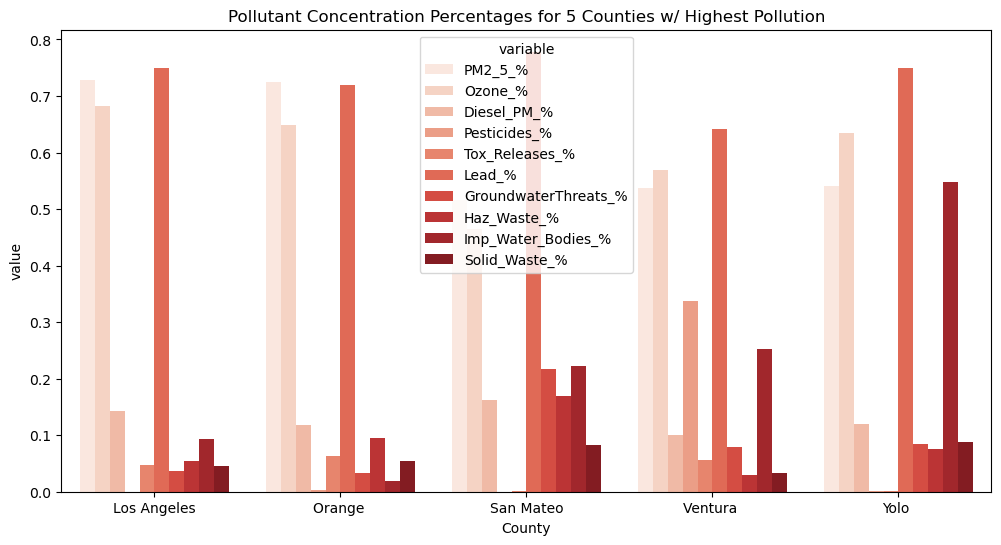

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(x='County', y='value', hue='variable',\
            data=top5_df.melt(id_vars=['County'], value_vars=pollutants_percent),\
            palette='Reds')

plt.title('Pollutant Concentration Percentages for 5 Counties w/ Highest Pollution')

In [44]:
# counties with the lowest concentration of pollution

df.groupby('County')['Pollution'].mean().nsmallest()

County
Sonoma          43.734162
Solano          46.693078
Sacramento      47.451960
Contra Costa    49.051548
Glenn           49.316832
Name: Pollution, dtype: float64

<Axes: xlabel='County'>

Text(0.5, 1.0, '5 Counties with Lowest Average Pollution Levels')

Text(0.5, 0, 'County')

Text(0, 0.5, 'Average Pollution Level')

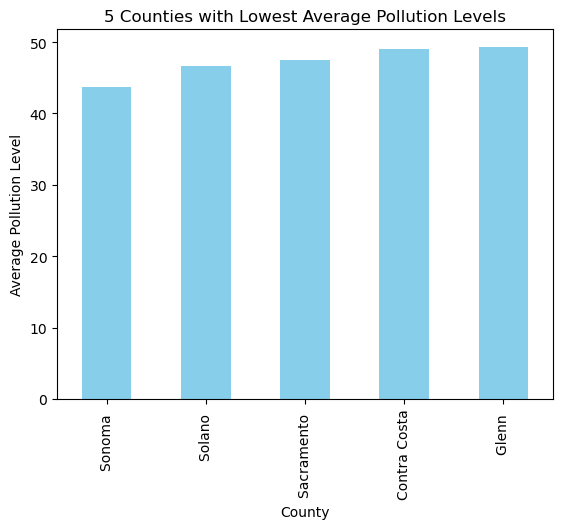

In [45]:
df.groupby('County')['Pollution'].mean().nsmallest().plot(kind='bar', color='skyblue')

plt.title("5 Counties with Lowest Average Pollution Levels")
plt.xlabel("County")
plt.ylabel("Average Pollution Level")

In [46]:
bottom_5_pollution = df.groupby('County')['Pollution'].mean().nsmallest(5).index

bottom5_df = df[df['County'].isin(bottom_5_pollution)].groupby('County')[['PM2_5', 'Ozone', 'Diesel_PM', 'Pesticides',\
                    'Tox_Releases', 'Lead', 'GroundwaterThreats', 'Haz_Waste', 'Imp_Water_Bodies', 'Solid_Waste']].mean()

In [47]:
bottom5_df

,PM2_5,Ozone,Diesel_PM,Pesticides,Tox_Releases,Lead,GroundwaterThreats,Haz_Waste,Imp_Water_Bodies,Solid_Waste
County,,,,,,,,,,
Contra Costa,8.873354,0.037439,0.400568,0.438869,1736.357900,66.092748,26.006757,2.335405,9.945946,2.194595
Glenn,8.613463,0.045393,0.115959,820.195806,19.019234,58.868226,33.500000,0.550000,4.000000,4.100000
Sacramento,8.980008,0.046650,0.288749,1.861754,133.267104,61.571158,33.607895,1.061491,6.807018,2.669298
Solano,8.913034,0.037874,0.225637,8.148221,882.843102,63.912446,46.069231,0.839231,6.307692,3.961538
Sonoma,7.324015,0.032479,0.396694,0.051543,0.752951,62.264305,96.850000,0.460000,4.500000,9.500000


In [48]:
# normalize the bar chart since concentration is not measured on the same metric
# convert to percentage (by dividing averages by max concentration for each type of pollutant)

bottom5_df['PM2_5_%'] = bottom5_df['PM2_5'].apply(lambda x: x/df.PM2_5.max())
bottom5_df['Ozone_%'] = bottom5_df['Ozone'].apply(lambda x: x/df.Ozone.max())
bottom5_df['Diesel_PM_%'] = bottom5_df['Diesel_PM'].apply(lambda x: x/df.Diesel_PM.max())
bottom5_df['Pesticides_%'] = bottom5_df['Pesticides'].apply(lambda x: x/df.Pesticides.max())
bottom5_df['Tox_Releases_%'] = bottom5_df['Tox_Releases'].apply(lambda x: x/df.Tox_Releases.max())
bottom5_df['Lead_%'] = bottom5_df['Lead'].apply(lambda x: x/df.Lead.max())
bottom5_df['GroundwaterThreats_%'] = bottom5_df['GroundwaterThreats'].apply(lambda x: x/df.GroundwaterThreats.max())
bottom5_df['Haz_Waste_%'] = bottom5_df['Haz_Waste'].apply(lambda x: x/df.Haz_Waste.max())
bottom5_df['Imp_Water_Bodies_%'] = bottom5_df['Imp_Water_Bodies'].apply(lambda x: x/df.Imp_Water_Bodies.max())
bottom5_df['Solid_Waste_%'] = bottom5_df['Solid_Waste'].apply(lambda x: x/df.Solid_Waste.max())

In [49]:
bottom5_df

,PM2_5,Ozone,Diesel_PM,Pesticides,Tox_Releases,Lead,GroundwaterThreats,Haz_Waste,Imp_Water_Bodies,Solid_Waste,PM2_5_%,Ozone_%,Diesel_PM_%,Pesticides_%,Tox_Releases_%,Lead_%,GroundwaterThreats_%,Haz_Waste_%,Imp_Water_Bodies_%,Solid_Waste_%
County,,,,,,,,,,,,,,,,,,,,
Contra Costa,8.873354,0.037439,0.400568,0.438869,1736.357900,66.092748,26.006757,2.335405,9.945946,2.194595,0.541232,0.511937,0.153753,6.968292e-06,0.017903,0.665236,0.048761,0.104868,0.268809,0.034157
Glenn,8.613463,0.045393,0.115959,820.195806,19.019234,58.868226,33.500000,0.550000,4.000000,4.100000,0.525379,0.620698,0.044509,1.302294e-02,0.000196,0.592520,0.062811,0.024697,0.108108,0.063813
Sacramento,8.980008,0.046650,0.288749,1.861754,133.267104,61.571158,33.607895,1.061491,6.807018,2.669298,0.547737,0.637892,0.110833,2.956063e-05,0.001374,0.619725,0.063013,0.047665,0.183973,0.041545
Solano,8.913034,0.037874,0.225637,8.148221,882.843102,63.912446,46.069231,0.839231,6.307692,3.961538,0.543652,0.517891,0.086608,1.293762e-04,0.009103,0.643291,0.086377,0.037684,0.170478,0.061658
Sonoma,7.324015,0.032479,0.396694,0.051543,0.752951,62.264305,96.850000,0.460000,4.500000,9.500000,0.446729,0.444111,0.152266,8.183987e-07,0.000008,0.626702,0.181588,0.020656,0.121622,0.147860


In [50]:
bottom5_df = bottom5_df.reset_index()
bottom5_df = bottom5_df.rename(columns={'index': 'County'})

In [51]:
bottom5_df

,County,PM2_5,Ozone,Diesel_PM,Pesticides,Tox_Releases,Lead,GroundwaterThreats,Haz_Waste,Imp_Water_Bodies,...,PM2_5_%,Ozone_%,Diesel_PM_%,Pesticides_%,Tox_Releases_%,Lead_%,GroundwaterThreats_%,Haz_Waste_%,Imp_Water_Bodies_%,Solid_Waste_%
0,Contra Costa,8.873354,0.037439,0.400568,0.438869,1736.357900,66.092748,26.006757,2.335405,9.945946,...,0.541232,0.511937,0.153753,6.968292e-06,0.017903,0.665236,0.048761,0.104868,0.268809,0.034157
1,Glenn,8.613463,0.045393,0.115959,820.195806,19.019234,58.868226,33.500000,0.550000,4.000000,...,0.525379,0.620698,0.044509,1.302294e-02,0.000196,0.592520,0.062811,0.024697,0.108108,0.063813
2,Sacramento,8.980008,0.046650,0.288749,1.861754,133.267104,61.571158,33.607895,1.061491,6.807018,...,0.547737,0.637892,0.110833,2.956063e-05,0.001374,0.619725,0.063013,0.047665,0.183973,0.041545
3,Solano,8.913034,0.037874,0.225637,8.148221,882.843102,63.912446,46.069231,0.839231,6.307692,...,0.543652,0.517891,0.086608,1.293762e-04,0.009103,0.643291,0.086377,0.037684,0.170478,0.061658
4,Sonoma,7.324015,0.032479,0.396694,0.051543,0.752951,62.264305,96.850000,0.460000,4.500000,...,0.446729,0.444111,0.152266,8.183987e-07,0.000008,0.626702,0.181588,0.020656,0.121622,0.147860


In [52]:
pollutants_percent = ['PM2_5_%', 'Ozone_%', 'Diesel_PM_%', 'Pesticides_%', 'Tox_Releases_%', 'Lead_%',\
                      'GroundwaterThreats_%', 'Haz_Waste_%', 'Imp_Water_Bodies_%', 'Solid_Waste_%']

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='County', ylabel='value'>

Text(0.5, 1.0, 'Pollutant Concentration Percentages for 5 Counties w/ Lowest Pollution')

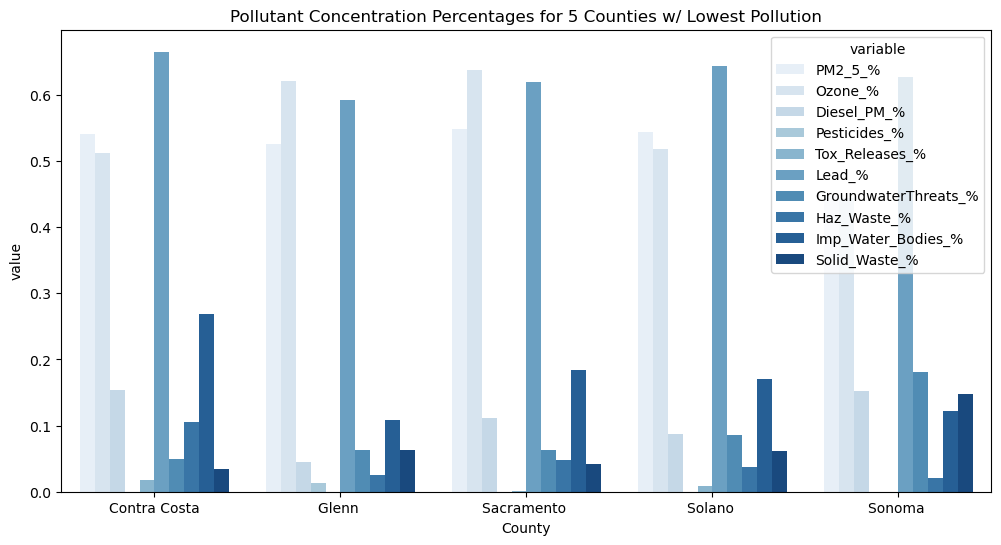

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(x='County', y='value', hue='variable',\
            data=bottom5_df.melt(id_vars=['County'], value_vars=pollutants_percent),\
            palette='Blues')

plt.title('Pollutant Concentration Percentages for 5 Counties w/ Lowest Pollution')

In [54]:
top5_df.drop(columns = ['PM2_5', 'Ozone', 'Diesel_PM', 'Pesticides', 'Tox_Releases', 'Lead', 'GroundwaterThreats',\
                        'Haz_Waste', 'Imp_Water_Bodies', 'Solid_Waste'])

,County,PM2_5_%,Ozone_%,Diesel_PM_%,Pesticides_%,Tox_Releases_%,Lead_%,GroundwaterThreats_%,Haz_Waste_%,Imp_Water_Bodies_%,Solid_Waste_%
0,Los Angeles,0.728860,0.682911,0.142804,0.000061,0.048004,0.749400,0.037128,0.053948,0.093869,0.045786
1,Orange,0.725367,0.647823,0.118012,0.002461,0.063846,0.719351,0.032477,0.095741,0.019630,0.054655
2,San Mateo,0.516200,0.464048,0.162353,0.000000,0.001713,0.778263,0.217879,0.168987,0.222222,0.083182
3,Ventura,0.537380,0.569789,0.099755,0.337421,0.055729,0.640724,0.079685,0.029759,0.253071,0.033958
4,Yolo,0.540634,0.633746,0.119232,0.001187,0.001909,0.749381,0.083904,0.075718,0.547297,0.087160


In [55]:
top5_df['Pollution Level'] = 'high'

In [56]:
bottom5_df.drop(columns = ['PM2_5', 'Ozone', 'Diesel_PM', 'Pesticides', 'Tox_Releases', 'Lead', 'GroundwaterThreats',\
                           'Haz_Waste', 'Imp_Water_Bodies', 'Solid_Waste'])

,County,PM2_5_%,Ozone_%,Diesel_PM_%,Pesticides_%,Tox_Releases_%,Lead_%,GroundwaterThreats_%,Haz_Waste_%,Imp_Water_Bodies_%,Solid_Waste_%
0,Contra Costa,0.541232,0.511937,0.153753,6.968292e-06,0.017903,0.665236,0.048761,0.104868,0.268809,0.034157
1,Glenn,0.525379,0.620698,0.044509,1.302294e-02,0.000196,0.592520,0.062811,0.024697,0.108108,0.063813
2,Sacramento,0.547737,0.637892,0.110833,2.956063e-05,0.001374,0.619725,0.063013,0.047665,0.183973,0.041545
3,Solano,0.543652,0.517891,0.086608,1.293762e-04,0.009103,0.643291,0.086377,0.037684,0.170478,0.061658
4,Sonoma,0.446729,0.444111,0.152266,8.183987e-07,0.000008,0.626702,0.181588,0.020656,0.121622,0.147860


In [57]:
bottom5_df['Pollution Level'] = 'low'

In [58]:
high_vs_low = pd.concat([top5_df, bottom5_df], axis=0, ignore_index=True)

In [59]:
high_vs_low

,County,PM2_5,Ozone,Diesel_PM,Pesticides,Tox_Releases,Lead,GroundwaterThreats,Haz_Waste,Imp_Water_Bodies,...,Ozone_%,Diesel_PM_%,Pesticides_%,Tox_Releases_%,Lead_%,GroundwaterThreats_%,Haz_Waste_%,Imp_Water_Bodies_%,Solid_Waste_%,Pollution Level
0,Los Angeles,11.949470,0.049943,0.372041,3.865660,4655.705841,74.454607,19.802003,1.201419,3.473146,...,0.682911,0.142804,6.137833e-05,0.048004,0.749400,0.037128,0.053948,0.093869,0.045786,high
1,Orange,11.892212,0.047377,0.307452,154.973130,6192.113387,71.469184,17.321579,2.132158,0.726316,...,0.647823,0.118012,2.460639e-03,0.063846,0.719351,0.032477,0.095741,0.019630,0.054655,high
2,San Mateo,8.462976,0.033937,0.422973,0.000000,166.156198,77.322256,116.205556,3.763333,8.222222,...,0.464048,0.162353,0.000000e+00,0.001713,0.778263,0.217879,0.168987,0.222222,0.083182,high
3,Ventura,8.810212,0.041670,0.259888,21251.031481,5404.940989,63.657403,42.500000,0.662727,9.363636,...,0.569789,0.099755,3.374205e-01,0.055729,0.640724,0.079685,0.029759,0.253071,0.033958,high
4,Yolo,8.863562,0.046347,0.310630,74.765835,185.153581,74.452719,44.750000,1.686250,20.250000,...,0.633746,0.119232,1.187120e-03,0.001909,0.749381,0.083904,0.075718,0.547297,0.087160,high
5,Contra Costa,8.873354,0.037439,0.400568,0.438869,1736.357900,66.092748,26.006757,2.335405,9.945946,...,0.511937,0.153753,6.968292e-06,0.017903,0.665236,0.048761,0.104868,0.268809,0.034157,low
6,Glenn,8.613463,0.045393,0.115959,820.195806,19.019234,58.868226,33.500000,0.550000,4.000000,...,0.620698,0.044509,1.302294e-02,0.000196,0.592520,0.062811,0.024697,0.108108,0.063813,low
7,Sacramento,8.980008,0.046650,0.288749,1.861754,133.267104,61.571158,33.607895,1.061491,6.807018,...,0.637892,0.110833,2.956063e-05,0.001374,0.619725,0.063013,0.047665,0.183973,0.041545,low
8,Solano,8.913034,0.037874,0.225637,8.148221,882.843102,63.912446,46.069231,0.839231,6.307692,...,0.517891,0.086608,1.293762e-04,0.009103,0.643291,0.086377,0.037684,0.170478,0.061658,low
9,Sonoma,7.324015,0.032479,0.396694,0.051543,0.752951,62.264305,96.850000,0.460000,4.500000,...,0.444111,0.152266,8.183987e-07,0.000008,0.626702,0.181588,0.020656,0.121622,0.147860,low


In [60]:
pollutants_percent = ['PM2_5_%', 'Ozone_%', 'Diesel_PM_%', 'Pesticides_%', 'Tox_Releases_%', 'Lead_%',\
                      'GroundwaterThreats_%', 'Haz_Waste_%', 'Imp_Water_Bodies_%', 'Solid_Waste_%']

high_vs_low.groupby('Pollution Level')[pollutants_percent].mean()

,PM2_5_%,Ozone_%,Diesel_PM_%,Pesticides_%,Tox_Releases_%,Lead_%,GroundwaterThreats_%,Haz_Waste_%,Imp_Water_Bodies_%,Solid_Waste_%
Pollution Level,,,,,,,,,,
high,0.609688,0.599663,0.128431,0.068226,0.034240,0.727424,0.090214,0.084831,0.227218,0.060948
low,0.520946,0.546506,0.109594,0.002638,0.005717,0.629495,0.088510,0.047114,0.170598,0.069807


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Pollution Level'>

<Figure size 1200x600 with 0 Axes>

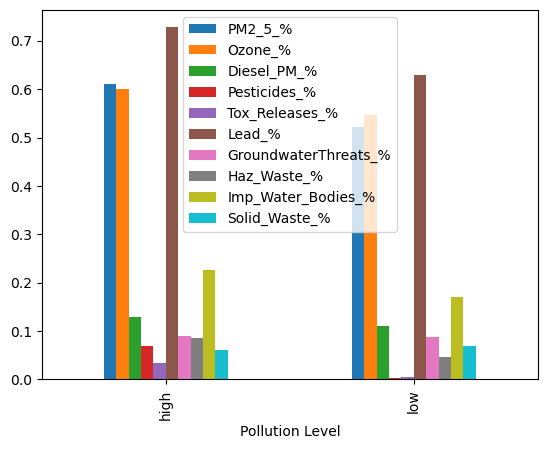

In [61]:
plt.figure(figsize=(12, 6))
high_vs_low.groupby('Pollution Level')[pollutants_percent].mean().plot(kind='bar')

In [104]:
top_5_pollution = df.groupby('County')['Pollution'].mean().nlargest(5).index

top5_factors = df[df['County'].isin(top_5_pollution)].groupby('County')[['Education', 'Population']].agg(['mean', 'sum'])

In [105]:
top5_factors

Education                 Population           
                  mean           sum         mean        sum
County                                                      
Los Angeles  33.506394  39303.000699  4318.402387  5065486.0
Orange       33.605264   3192.500087  5939.621053   564264.0
San Mateo    24.788889    223.100000  6101.333333    54912.0
Ventura      36.900000    405.900000  5258.727273    57846.0
Yolo         26.725000    106.900000  6267.250000    25069.0

In [64]:
top5_factors.Education.mean()
top5_factors.Population.mean()

31.10510948472974

5577.0668091467915

In [106]:
bottom_5_pollution = df.groupby('County')['Pollution'].mean().nsmallest(5).index

bottom5_factors = df[df['County'].isin(bottom_5_pollution)].groupby('County')[['Education', 'Population']].agg(['mean', 'sum'])

In [107]:
bottom5_factors

Education           Population          
                   mean     sum         mean       sum
County                                                
Contra Costa  26.227027   970.4  5944.864865  219960.0
Glenn         21.900000    21.9  7118.000000    7118.0
Sacramento    22.224561  1266.8  4837.385965  275731.0
Solano        18.392308   239.1  4302.615385   55934.0
Sonoma        28.650000    57.3  6138.000000   12276.0

In [67]:
bottom5_factors.Education.mean()
bottom5_factors.Population.mean()

23.4787792245687

5668.173242878506

In [112]:
df.groupby('County')['Population'].sum().nlargest(15)

County
Los Angeles       5065486.0
San Bernardino     936111.0
Fresno             627720.0
Riverside          571667.0
Orange             564264.0
Kern               473059.0
San Joaquin        406190.0
Stanislaus         327469.0
Tulare             299178.0
Sacramento         275731.0
San Diego          266085.0
Merced             227307.0
Contra Costa       219960.0
Alameda            193292.0
Imperial           132202.0
Name: Population, dtype: float64

In [133]:
most_populated = df.groupby('County')['Population'].sum().nlargest(15).index

most_pop_df = df[df['County'].isin(most_populated)].groupby('County')[['Pollution', 'PollutionScore']].mean()

In [134]:
most_pop_df

,Pollution,PollutionScore
County,,
Alameda,51.103278,6.239700
Contra Costa,49.051548,5.989184
Fresno,53.311436,6.509316
Imperial,49.539556,6.048770
Kern,50.881691,6.212644
Los Angeles,57.884580,7.067696
Merced,51.102430,6.239596
Orange,58.540452,7.147778
Riverside,50.329106,6.145174


<Axes: xlabel='County'>

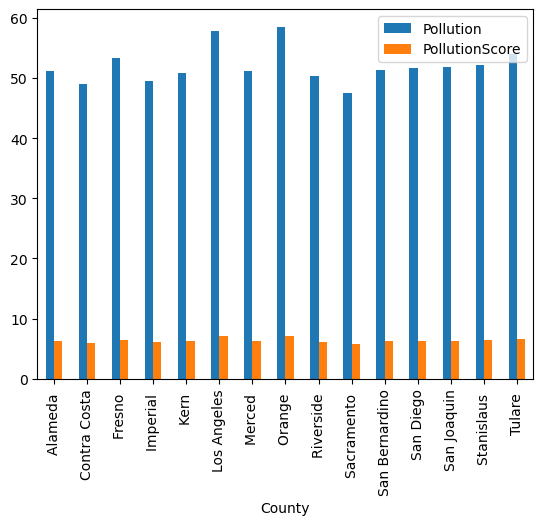

In [135]:
most_pop_df.plot(kind='bar')

In [136]:
least_populated = df.groupby('County')['Population'].sum().nsmallest(15).index

least_pop_df = df[df['County'].isin(least_populated)].groupby('County')[['Pollution', 'PollutionScore']].mean()

In [137]:
least_pop_df

,Pollution,PollutionScore
County,,
Butte,51.644652,6.305802
Glenn,49.316832,6.021575
Kings,52.067362,6.357415
Monterey,53.261712,6.503244
San Francisco,50.662156,6.185839
San Mateo,55.416976,6.766402
Santa Barbara,52.729450,6.438255
Santa Clara,49.770928,6.077020
Santa Cruz,53.392771,6.519247


<Axes: xlabel='County'>

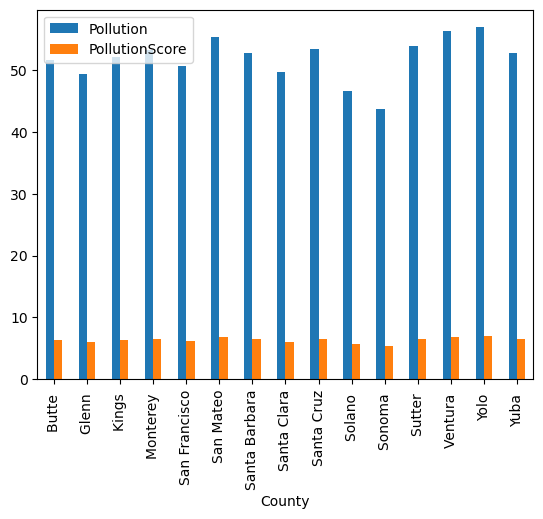

In [138]:
least_pop_df.plot(kind='bar')

### Finding 3: Counties with higher poverty rates (>24.4%) and lower toxic releases have high unemployment rates. 

### Managerial Insight 3: Focus on economic development and job creation in economically disadvantaged areas to decrease unemployment rates and poverty rates 
1. High unemployment rates in counties with both high poverty and lower toxic releases suggest that these counties may be underdeveloped and lack sufficient industries to provide jobs.Lower toxic releases, indicates that these counties are less industrialized or have fewer polluting industries which relates to less job opportunities. 
2. Industries with high toxic releases often provide jobs, particularly in sectors like manufacturing, mining, and energy. Which in turn relates to relates to limited economic activity and a lack of diverse employment opportunities 

### Decision Tree

In [16]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [17]:
for c in df.columns: 
    print(c + ' ' + str(df[c].nunique()))

OBJECTID_1 4738
COUNTYFP 57
ALAND 4735
AWATER 1255
Tract 4738
Lat 4738
Long 4738
CIscore 2289
Ozone 114
PM2_5 2021
Diesel_PM 2306
Pesticides 753
Tox_Releases 2310
Traffic 2310
Drinking_Water 959
Lead 2288
Cleanups 705
GroundwaterThreats 711
Haz_Waste 578
Imp_Water_Bodies 33
Solid_Waste 261
PollutionScore 2311
Asthma 1564
Low_Birth_Weight 605
Cardiovascular 1061
Education 555
Ling_Isol 433
Poverty 616
Unemployment 218
HousBurd 373
Child_10 2268
Pop_10_64 2276
Elderly_65 2280
Hispanic 2294
White 2267
African_American 2104
Native_American 856
Asian_American 2126
Pacific_Islander 670
Other_Multiple 1937
County 31
ApproxLoc 289
MHI_2019_5YR 4096
Avg_hshld_size 6
HCD_Low_2021 98
HCD_Moderate_2021 92
Income_Group 1
DAC_and_or_LIC 1


In [18]:
df = pd.get_dummies(df, columns=['County', 'ApproxLoc', 'Income_Group', 'MHI_2019_5YR', 'DAC_and_or_LIC','HCD_Moderate_2021', 'HCD_Low_2021'], dummy_na=True)

In [19]:
df.shape

(4738, 4656)

### Make Unemployment Binary

In [23]:
df.Unemployment.describe()

count    4738.000000
mean        7.157197
std         3.920486
min         0.000000
25%         4.500000
50%         6.500000
75%         9.300000
max        43.900000
Name: Unemployment, dtype: float64

In [24]:
df.Unemployment.nunique()

217

In [25]:
df.Unemployment.max()

43.9

In [26]:
unemployment_thresh = df.Unemployment.mean()

In [27]:
df['Unemployment1'] = df['Unemployment'].apply(lambda x: 0 if x > unemployment_thresh else 1)

In [28]:
df.drop(columns='Unemployment', inplace=True)

In [29]:
df.rename(columns={'Unemployment1':'Unemployment'}, inplace=True)

### Train the decision tree

In [30]:
Y = df.Unemployment

In [31]:
X = df.drop(columns='Unemployment', axis=1)

In [36]:
X.shape

(4738, 4655)

In [37]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

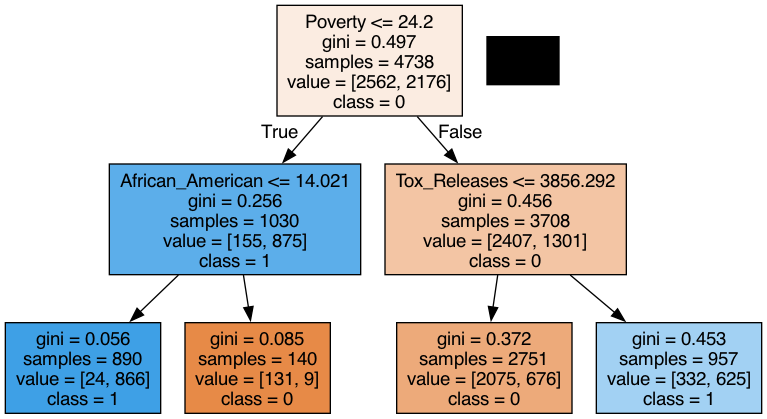

In [66]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

**Interpretations:** 

**Left side of the tree:** 

- Counties with lower poverty rates and lower percentage of African American's have low unemployment rates. 

**Right side of the tree:** 

- Counties with higher poverty rates and lower toxic releases have high unemployment rates. 

### Verify Findings with Graphs 

In [67]:
df2 = df.copy()

In [68]:
Poverty_thresh = 24.2

In [69]:
df2['Poverty_Bin'] = df.Poverty.apply(lambda x: "Low Poverty" \
                                                       if x <= Poverty_thresh else "High Poverty")

In [72]:
toxic_tresh = 3856.292

In [73]:
df2['Tox_ReleasesB'] = df.Tox_Releases.apply(lambda x: "Low Toxic Release" \
                                                       if x <= toxic_tresh else "High Toxic Release")

/Users/senitghile/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


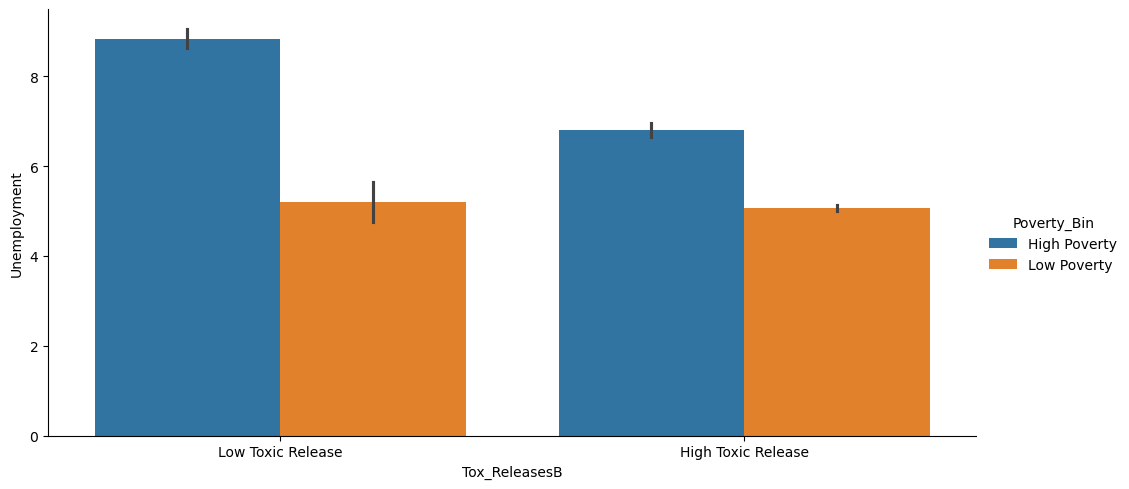

In [76]:
sns.catplot(x='Tox_ReleasesB', y='Unemployment', hue='Poverty_Bin', data=df2, kind='bar', aspect=2)

# Dataset Limitations 

As we have mentioned the dataset had large gaps of missing data which lead to different conclusions that what was expectd (i.e. correlations with pollution and health outcome). But we adjusted as best we could to conduct the analysis.